# MI
**_Ahmed - Luisa - Myria_**

## Exercise H62.1: Long short-term memory (LSTM)

### a) Creating training and validation datasets

In [21]:
import numpy as np

SERIES_SIZE = 30

def generate_series(series_size, total_count):
    # res = []
    # for i in range(total_count):
    #     res.append([list(np.random.randint(0,10, 1)) for k in range(series_size)])
    return [list(np.random.randint(0, 10, series_size)) for i in range(total_count)]

def evaluate_series(series):
    # return 1 if sum([s[0] for s in series]) >= 100 else 0
    return 1 if sum(series) >= 100 else 0

def generate_input_output(collection_of_series):
    output = [evaluate_series(series) for series in collection_of_series]
    return np.array(collection_of_series), output

X_train, y_train = generate_input_output(generate_series(SERIES_SIZE, 8000))
X_holdout, y_holdout = generate_input_output(generate_series(SERIES_SIZE, 2000))

### b) Building an RNN

**1. Prepare the data**

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Reshape to 3D (samples_size, sequence_length, features)
X_train = X_train.reshape(len(X_train), SERIES_SIZE, 1)
X_holdout = X_holdout.reshape(len(X_holdout), SERIES_SIZE, 1)

# Make sure all are as array to avoid model complaining
X_train = np.asarray(X_train)
X_holdout = np.asarray(X_holdout)

y_train = np.asarray(y_train)
y_holdout = np.asarray(y_holdout)

**2. Define the LSTM model**

In [23]:
from tensorflow.keras import Input, optimizers
from tensorflow.keras.layers import Dense, Activation, LSTM, Embedding
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import sequence

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(30, 1)))
lstm_model.add(Dense(1))
lstm_model.add(Activation('sigmoid'))

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


**3. Compile and run the model**

In [24]:
from tensorflow.keras.backend import clear_session
clear_session()

lstm_model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
    metrics=["accuracy"])
lstm_model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=60,
    validation_data=(X_holdout, y_holdout)
)

Epoch 1/60
160/160 [==============================] - 6s 32ms/step - loss: 0.0529 - accuracy: 0.9865 - val_loss: 0.0515 - val_accuracy: 0.9815
Epoch 2/60
160/160 [==============================] - 5s 31ms/step - loss: 0.0414 - accuracy: 0.9865 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 3/60
160/160 [==============================] - 5s 33ms/step - loss: 0.0493 - accuracy: 0.9865 - val_loss: 0.3252 - val_accuracy: 0.9815
Epoch 4/60
160/160 [==============================] - 6s 35ms/step - loss: 0.0602 - accuracy: 0.9862 - val_loss: 0.1842 - val_accuracy: 0.9815
Epoch 5/60
160/160 [==============================] - 5s 34ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0418 - val_accuracy: 0.9815
Epoch 6/60
160/160 [==============================] - 6s 36ms/step - loss: 0.0287 - accuracy: 0.9865 - val_loss: 0.0453 - val_accuracy: 0.9815
Epoch 7/60
160/160 [==============================] - 6s 35ms/step - loss: 0.0326 - accuracy: 0.9865 - val_loss: 0.0395 - val_accuracy: 0.9815

**4. Test the model using a novel prediction**

In [25]:
x = np.random.randint(0, 10, SERIES_SIZE)
y = 1 if np.sum(x) > 100 >= 100 else 0 

x = np.asarray(x.reshape(1, SERIES_SIZE, 1))
print(y)

lstm_model.predict(x)

1
1/1 [==============================] - 0s 159ms/step


array([[1.]], dtype=float32)

**5. Class distribuition of data**

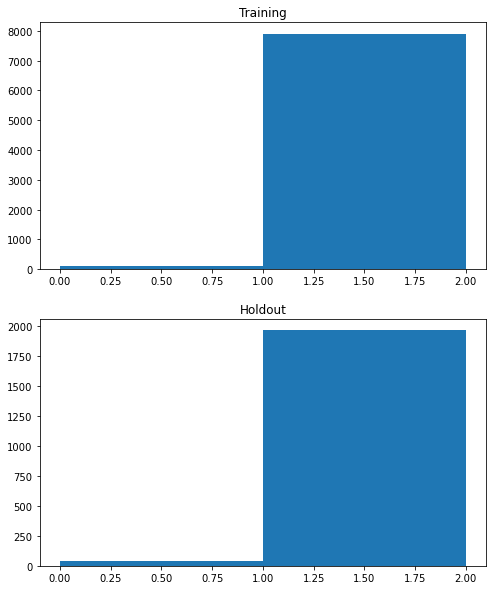


We can see that most of the data has a value 1 (i.e sum of sequence is > 100). This might make the model learn the wrong thing (ex. it's always 1 for example, or having values >2)



In [49]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(y_train, bins=[0,1,2])
# plt.stairs(counts, bins)
# counts
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.hist(y_train, bins=[0,1,2], label="train")
plt.title("Training")
plt.subplot(212)
plt.hist(y_holdout, bins=[0,1,2], label="holdout")
plt.title("Holdout")
plt.show()

print("""
We can see that most of the data has a value 1 (i.e sum of sequence is > 100). This might make the model learn the wrong thing (ex. it's always 1 for example, or having values >2)
""")